### $\int \omega(\theta)d\theta$ vs $K_{abs}$

R-squared: 0.932
R-squared: 0.880
R-squared: 0.963


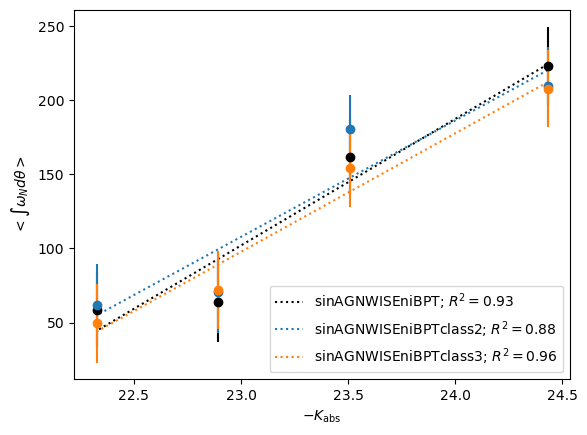

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

fig, ax = plt.subplots()


for sample, color in zip(['sinAGNWISEniBPT','sinAGNWISEniBPTclass2','sinAGNWISEniBPTclass3'],['k','C00','C01']):

    filename = f'../data/int_K_nq{nquant}_nbs{nbootstrap}_{sample}.npz'


    data = ascii.read(filename)

    from scipy import stats

    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']

    res = stats.linregress(-meanMag, int_mean)
    print(f"R-squared: {res.rvalue**2:.3f}")

    ax.plot(-meanMag, res.intercept - res.slope*meanMag, ls=':',c=color,\
            label=f'{sample}; '+r'$R^2=$'+f'{res.rvalue**2:.2f}')

    for i in range(len(int_mean)):
        ax.errorbar(-meanMag[i],int_mean[i],yerr=int_std[i],c=color,fmt='o')


ax.set_ylabel(r'$<\int\omega_Nd\theta>$')
ax.set_xlabel(r'$-K_{\mathrm{abs}}$')

ax.legend(loc=4)

plt.savefig(f'../plots/int_K_nq{nquant}_nbs{nbootstrap}_comparison.png')

plt.show()



### Autocorrelations

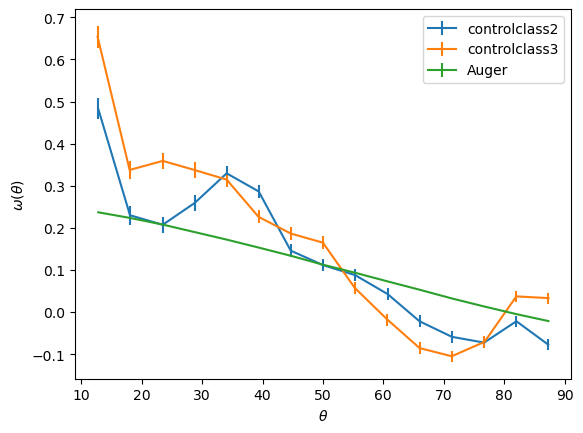

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(100)

fig, ax = plt.subplots()


for sample, color in zip(['controlclass2','controlclass3','Auger'],['C00','C01','C02']):

    try:
        filename = f'../data/autoCorr_nbs{nbootstrap}_{sample}.npz'
        data = ascii.read(filename)

    except FileNotFoundError:
        filename = f'../data/autoCorr_nbs50_{sample}.npz'
        data = ascii.read(filename)


    from scipy import stats

    xi_mean = data['xi_mean']
    varxi = data['varxi']
    theta = data['theta']

    ax.errorbar(theta,xi_mean,yerr=np.sqrt(varxi),c=color,fmt='-',label=sample)


ax.set_ylabel(r'$\omega(\theta)$')
ax.set_xlabel(r'$\theta$')

ax.legend()

plt.savefig(f'../plots/autoCorr_nbs{nbootstrap}_comparison.png')

plt.show()

